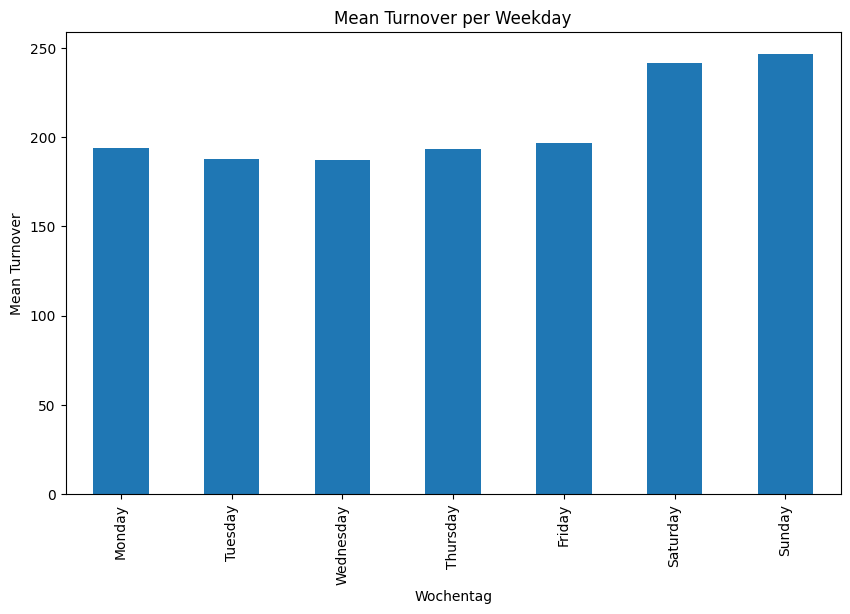

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Convert the 'Datum' column to datetime format
data['Datum'] = pd.to_datetime(data['Datum'])

# Create a new column for the weekday from the 'Datum' column
data['Wochentag'] = data['Datum'].dt.day_name()

# Group data by weekday and calculate mean turnover
mean_turnover_per_weekday = data.groupby('Wochentag')['Umsatz'].mean()

# Reorder the index to maintain the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_turnover_per_weekday = mean_turnover_per_weekday.reindex(weekday_order)

# Create a bar graph of the mean turnover per weekday
plt.figure(figsize=(10, 6))
mean_turnover_per_weekday.plot(kind='bar')
plt.xlabel('Wochentag')  # X-axis label
plt.ylabel('Mean Turnover')  # Y-axis label
plt.title('Mean Turnover per Weekday')  # Title
plt.show()  # Display the bar graph


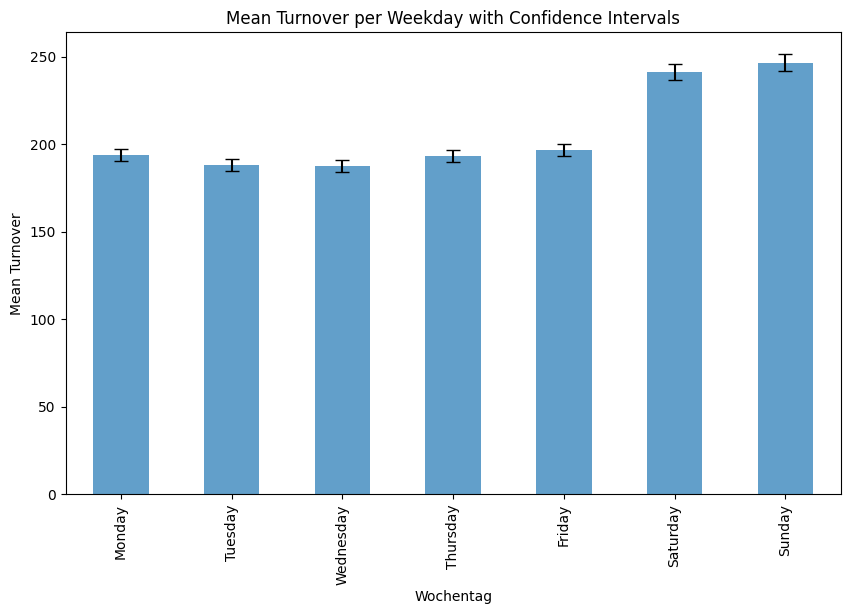

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Convert the 'Datum' column to datetime format
data['Datum'] = pd.to_datetime(data['Datum'])

# Create a new column for the weekday from the 'Datum' column
data['Wochentag'] = data['Datum'].dt.day_name()

# Group data by weekday and calculate mean turnover and standard error of the mean
grouped_data = data.groupby('Wochentag')['Umsatz']
mean_turnover_per_weekday = grouped_data.mean()
sem_turnover_per_weekday = grouped_data.apply(sem)

# Reorder the index to maintain the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_turnover_per_weekday = mean_turnover_per_weekday.reindex(weekday_order)
sem_turnover_per_weekday = sem_turnover_per_weekday.reindex(weekday_order)

# Create a bar graph of the mean turnover per weekday with error bars (confidence intervals)
plt.figure(figsize=(10, 6))
mean_turnover_per_weekday.plot(kind='bar', yerr=sem_turnover_per_weekday, capsize=5, alpha=0.7)
plt.xlabel('Wochentag')  # X-axis label
plt.ylabel('Mean Turnover')  # Y-axis label
plt.title('Mean Turnover per Weekday with Confidence Intervals')  # Title
plt.show()  # Display the bar graph


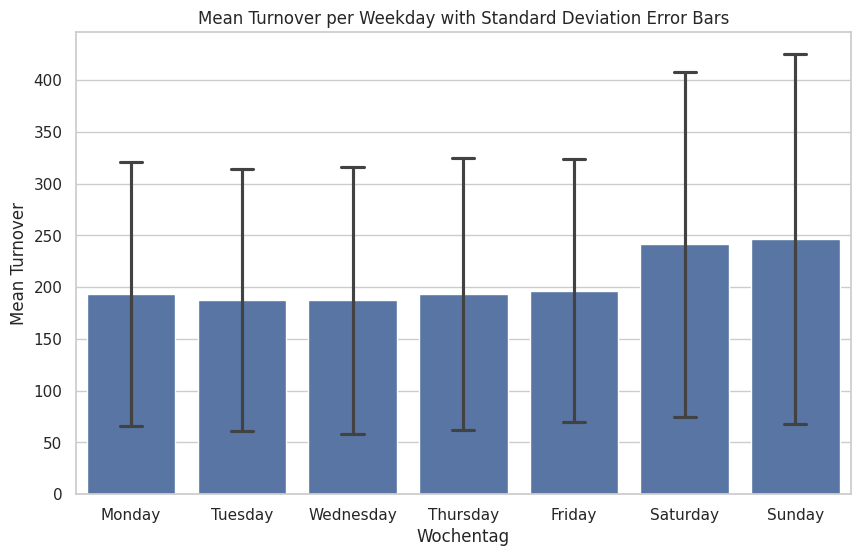

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Convert the 'Datum' column to datetime format
data['Datum'] = pd.to_datetime(data['Datum'])

# Create a new column for the weekday from the 'Datum' column
data['Wochentag'] = data['Datum'].dt.day_name()

# Define the order of weekdays for consistent ordering
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar plot of mean turnover per weekday with standard deviation error bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Wochentag', y='Umsatz', data=data, errorbar='sd', order=weekday_order, capsize=0.2)

# Set the labels and title
plt.xlabel('Wochentag')
plt.ylabel('Mean Turnover')
plt.title('Mean Turnover per Weekday with Standard Deviation Error Bars')

# Show the plot
plt.show()


/tmp/ipykernel_21906/960784333.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = data.groupby('Warengruppe')['Umsatz'].describe()


Overall Descriptive Statistics:
 count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64

Descriptive Statistics by Product Group:
               count        mean         std         min         25%  \
Warengruppe                                                           
1            1819.0  122.142509   40.299209   23.108406   96.436728   
2            1819.0  402.497911  139.660208  174.999832  289.050638   
3            1819.0  163.340920   75.578308   37.739245  105.589349   
4            1766.0   87.954042   35.318400   27.433726   66.024297   
5            1819.0  276.795509   99.472740  121.493282  228.972912   
6             292.0   66.916635   32.372569    7.051201   41.559645   

                    50%         75%          max  
Warengruppe                                       
1            120.053295  144.264423   416.788764  
2    

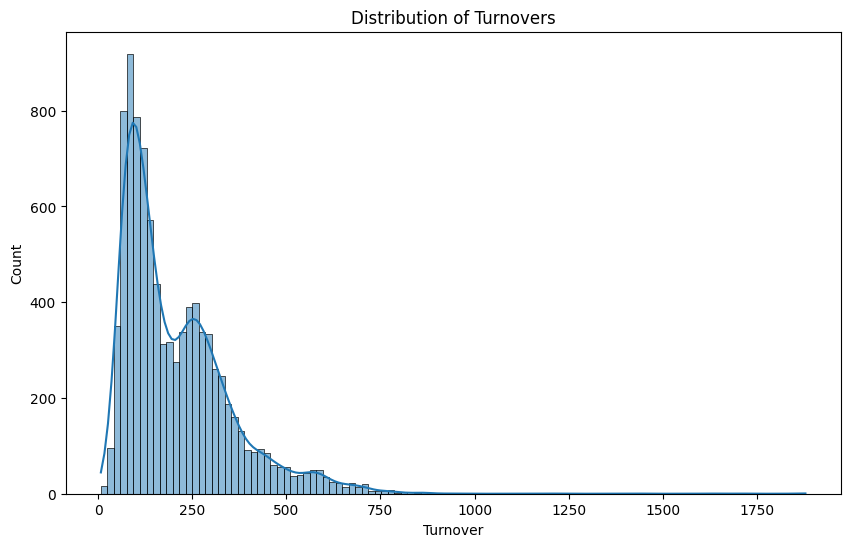

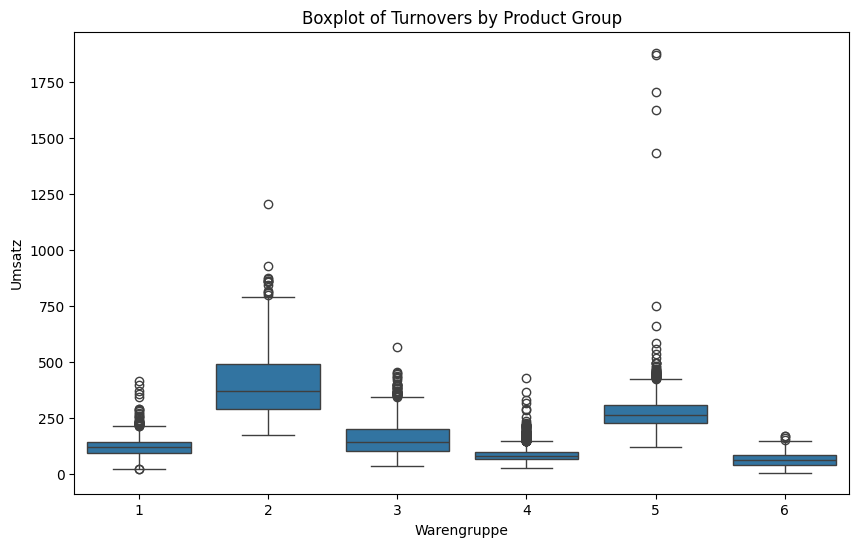

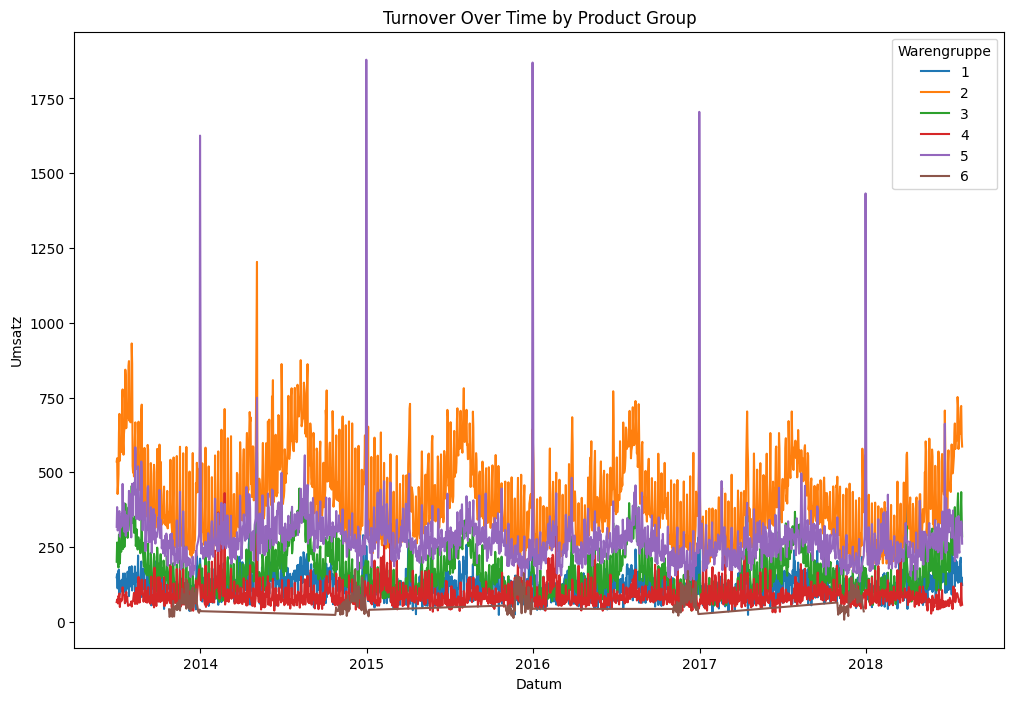

/tmp/ipykernel_21906/960784333.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_turnover_by_group = data.groupby('Warengruppe')['Umsatz'].sum()


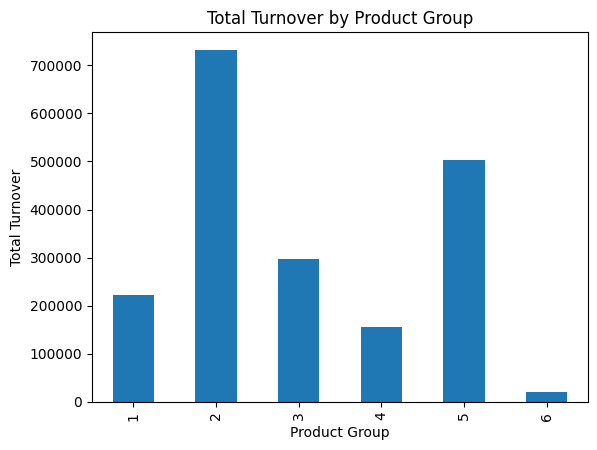

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a CSV file named "data.csv"
data = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Convert the 'Datum' column to date format
data['Datum'] = pd.to_datetime(data['Datum'])

# Convert 'Warengruppe' to categorical type
data['Warengruppe'] = data['Warengruppe'].astype('category')

# Overall descriptive statistics
overall_stats = data['Umsatz'].describe()

# Descriptive statistics by product group
group_stats = data.groupby('Warengruppe')['Umsatz'].describe()

print("Overall Descriptive Statistics:\n", overall_stats)
print("\nDescriptive Statistics by Product Group:\n", group_stats)

# Histogram of turnovers
plt.figure(figsize=(10, 6))
sns.histplot(data['Umsatz'], kde=True)
plt.title('Distribution of Turnovers')
plt.xlabel('Turnover')
plt.show()

# Boxplot of turnovers by product group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Warengruppe', y='Umsatz', data=data)
plt.title('Boxplot of Turnovers by Product Group')
plt.show()

# Line plot of turnovers over time by product group
plt.figure(figsize=(12, 8))
sns.lineplot(x='Datum', y='Umsatz', hue='Warengruppe', data=data)
plt.title('Turnover Over Time by Product Group')
plt.show()

# Bar chart of total turnover by product group
total_turnover_by_group = data.groupby('Warengruppe')['Umsatz'].sum()
total_turnover_by_group.plot(kind='bar')
plt.title('Total Turnover by Product Group')
plt.ylabel('Total Turnover')
plt.xlabel('Product Group')
plt.show()

In [2]:
import pandas as pd

# Read the CSV files into pandas DataFrames
df_umsatz = pd.read_csv('umsatzdaten_gekuerzt.csv')
df_kiwo = pd.read_csv('kiwo.csv')
df_wetter = pd.read_csv('wetter.csv')

# Merge df_umsatz and df_kiwo on the key 'date'
merged_df_1 = pd.merge(df_umsatz, df_kiwo, on='Datum')

# Merge the result with df_wetter on the key 'date'
final_merged_df = pd.merge(merged_df_1, df_wetter, on='Datum')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())

# Optional: Save the final merged data to a CSV file
final_merged_df.to_csv('merged_data.csv', index=False)


        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2014-06-21            1  162.410673            1         6.0     15.5125   
1  2014-06-22            1   99.627613            1         5.0     15.7000   
2  2014-06-23            1  130.997405            1         4.0     16.5000   
3  2014-06-24            1  119.068456            1         7.0     14.3625   
4  2014-06-25            1  114.248640            1         0.0     18.4375   

   Windgeschwindigkeit  Wettercode  
0                   18        61.0  
1                   19         NaN  
2                   17         NaN  
3                    7        21.0  
4                   10         NaN  
